# Contents
1. Import Necessary Libraries
2. Importing and exploring the datasets
3. Data Cleaning
4. Exploratory Data Analysis
5. Data Wrangling
6. Choosing the best model

# 1.) Importing Necessary Libraries

To begin with, we need to import the necessary Python libraries that will be used in this project, the libraries can be observed below

In [2]:
#import libraries that will be used in this kernel
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.simplefilter(action="ignore")

# 2.) Importing and exploring the datasets

Next we import our testing and training dataset using **pd.read_csv** and observe our datasets to note the variables and the kind of data we are about to work on by using the **describe()** function.

In [3]:
#import datasets
train =pd.read_csv('C:/Users/TRACY WHITNEY/Desktop/kaggle datasets/Titanic datasets/train.csv')
test = pd.read_csv('C:/Users/TRACY WHITNEY/Desktop/kaggle datasets/Titanic datasets/test.csv')
combine=[train,test]

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


From the variables above we can further categorize them according to its features;
 * **Alphanumeric** : Ticket,Cabin
 * **Numerical** : Age, SibSp,Parch,Fare
 * **Categorical** :Survived,Pclass,Sex,Embarked

# 3.) Data Cleaning


In the data cleaning process we will mainly focus on fixing issues such as ,missing values in this case.

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

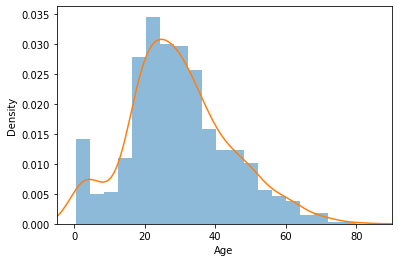

In [8]:
hst=train['Age'].hist(bins=20,density=True,stacked=True,alpha=0.5)
train['Age'].plot(kind='density')
hst.set(xlabel='Age')
plt.xlim(-5,90)
plt.show()

From the histogram above we notice that the 'Age' is rightly skewed. It would be best to use the median to fill in the NaN values ,since using the mean will give a biased outcome

In [9]:
print("%.2f is the median of the age"%(train['Age'].median(skipna=True)))

28.00 is the median of the age


2. Cabin
Since cabin values has 687 missing values, we wont use this in our model

3. Embarked
There are only 2 missing values  for 'Embarked', so we will use the port where most occupants boarded from to fill in the missing values

The ports the occupants used were C=Cherbourg,S=Southhampton,Q=Queenstow
S    644
C    168
Q     77
Name: Embarked, dtype: int64


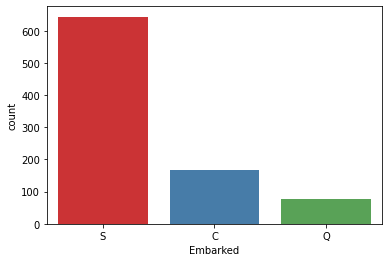

In [10]:
print('The ports the occupants used were C=Cherbourg,S=Southhampton,Q=Queenstow')
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train,palette='Set1')
plt.show()

S=Southhampton is the most common embark port that was used.

In the next step I will take care of the NaN values 
-The median age(28) will be input for the missing 'Age'.
-The cabin variable will be dropped
-The most common embark port S will be input for the missing 'Embarked'

In [11]:
train['Age'].fillna(train['Age'].median(skipna=True),inplace=True)
train['Embarked'].fillna(train['Embarked'].value_counts().idxmax(),inplace=True)
train.drop('Cabin',axis=1,inplace=True)

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 4.) Exploratory Data Analysis
1. Analyzing categorical,ordinal and discrete variables
The categorical variables in this kernel are Sex,Pclass,SibSp and Parch

In [13]:
#Barchart for survival
def bar_chart_stacked(dataset,feature,stacked=True):
    Survived=dataset[train['Survived']==1][feature].value_counts()
    Dead=dataset[train['Survived']==0][feature].value_counts()
    df_survived_dead=pd.DataFrame([Survived,Dead])
    df_survived_dead.index=['Survived','Died']
    hx=df_survived_dead.plot(kind='bar',stacked=stacked , figsize=(10,10))

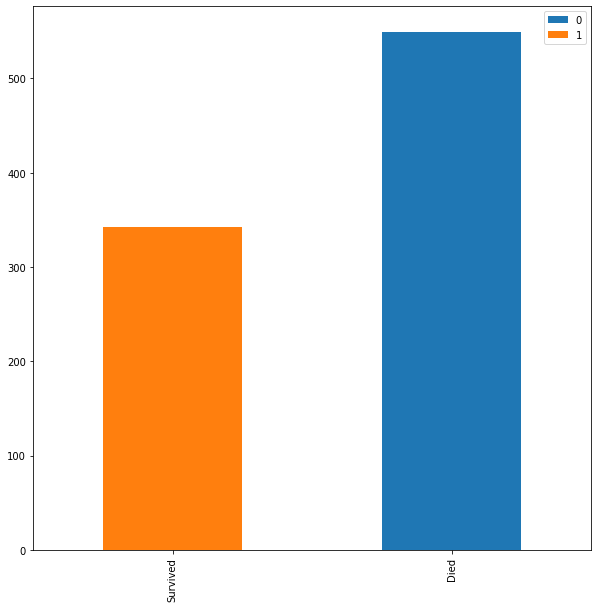

In [14]:
bar_chart_stacked(train,'Survived')

More passengers from the Titanic perished as compared to those who survived.

In [15]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


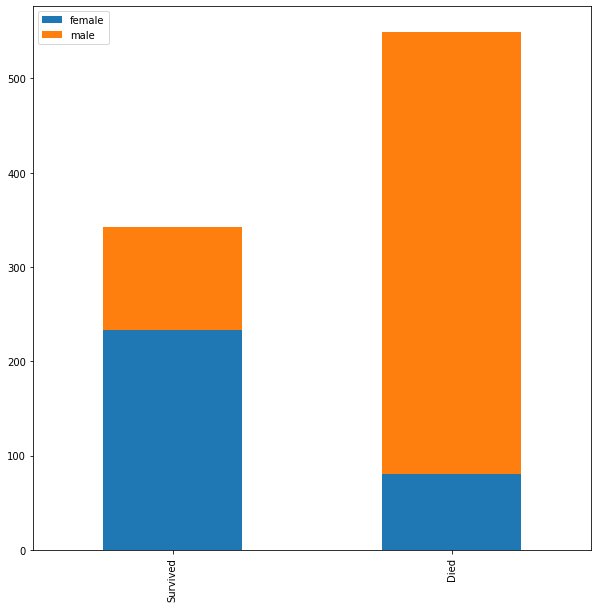

In [16]:
bar_chart_stacked(train,'Sex')

In terms of Sex, more males died as compared to their female counterparts. This could be because women were given the first priority in securing them a safe spot when the crash happened.

In [17]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass',ascending=False)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


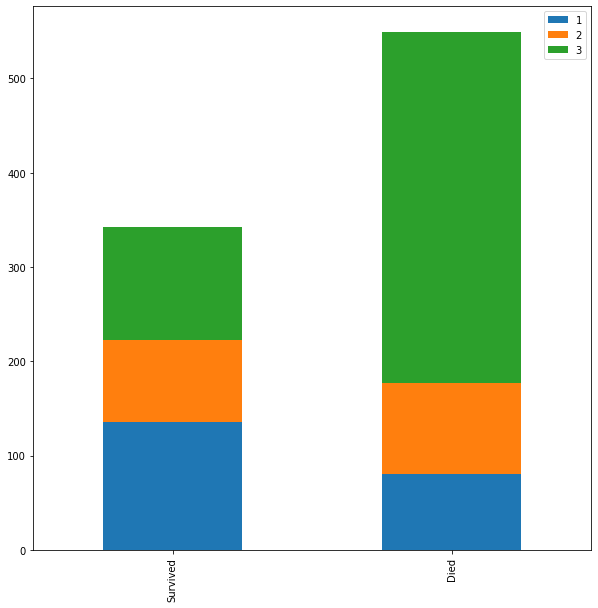

In [18]:
bar_chart_stacked(train,'Pclass')

In [19]:
def bar_chart_compare(dataset, feature1, feature2=None):
    plt.figure(figsize=[10,10])
    dx= sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=train).set_ylabel('Survival rate')

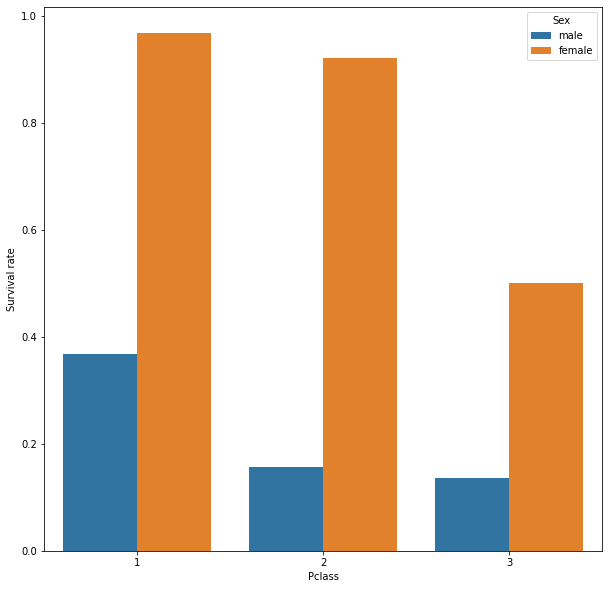

In [20]:
bar_chart_compare(train,'Pclass','Sex')

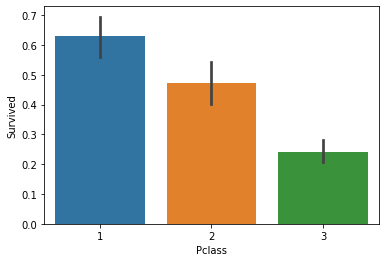

In [21]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.show()

In terms of Passenger Class, there was a lowest chance of survival among the passengers who boarded 3rd class , while the chance of survival was highest among passengers who boarded first class. So apparently, being in the first class was the safest option.

In [22]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp',ascending=False)

,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


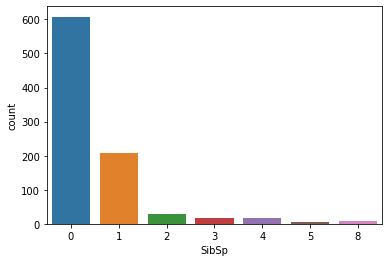

In [23]:
sns.countplot(train.SibSp)
plt.show()

In [24]:
def show_compare_countplot(dataset,feature1,feature2,title):
    fig,ax=plt.subplots(figsize=(5,5))
    x=sns.countplot(x=feature1,hue=feature2,data=dataset,ax=ax).set_title(title)
    

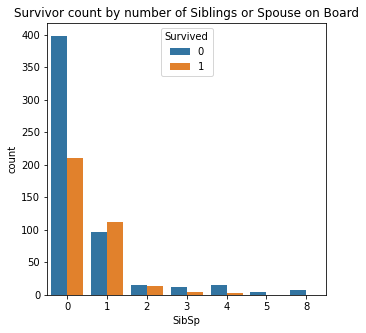

In [25]:
show_compare_countplot(train,'SibSp','Survived','Survivor count by number of Siblings or Spouse on Board')

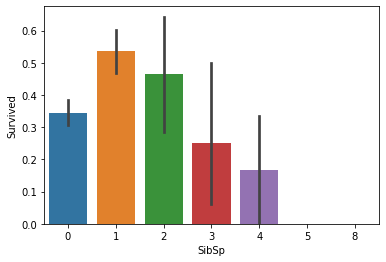

In [26]:
sns.barplot(x='SibSp',y='Survived',data=train)
plt.show()

Passengers who were travelling alone were least likely to perish from the disaster, as compared passengers who travelled with siblings or spouses.

In [27]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch',ascending=False)

,Parch,Survived
6,6,0.000000
5,5,0.200000
4,4,0.000000
3,3,0.600000
2,2,0.500000
1,1,0.550847
0,0,0.343658


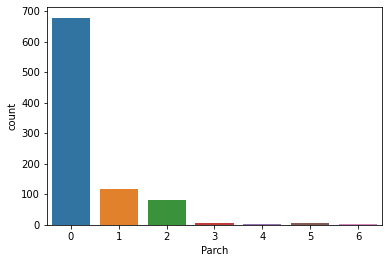

In [28]:
sns.countplot(train.Parch)
plt.show()

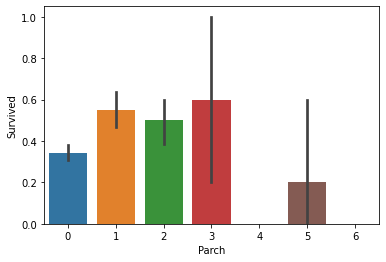

In [29]:
sns.barplot(x='Parch',y='Survived',data=train)
plt.show()

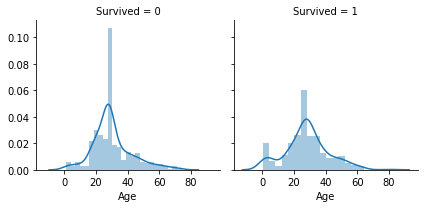

In [30]:
#Exploration of Age against Survived distribution
p=sns.FacetGrid(train,col='Survived')
p=p.map(sns.distplot,'Age')

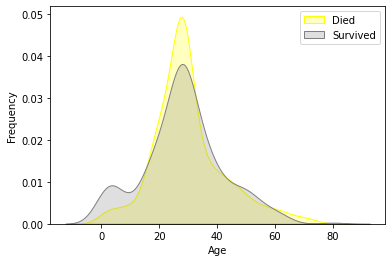

In [31]:
#Exploration of Age
p=sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())],color='Yellow',shade=True)
p=sns.kdeplot(train['Age'][(train['Survived']==1) & (train['Age'].notnull())],ax=p,color='Grey',shade=True)
p.set_xlabel('Age')
p.set_ylabel('Frequency')
p=p.legend(['Died','Survived'])

There was a higher chance of survival among the younger population, since the majority of the passengers that boarded were young people, as observed from the age distribution curve.

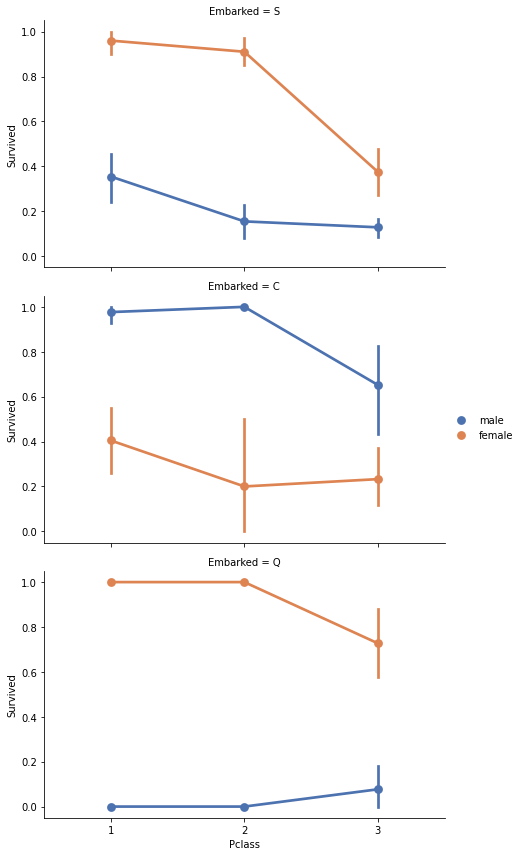

In [32]:
#Exploration of Pclass and Gender on Embarked
fg=sns.FacetGrid(train,row='Embarked',size=4.0,aspect=1.6)
fg.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep',order=None,hue_order=None)
fg.add_legend()

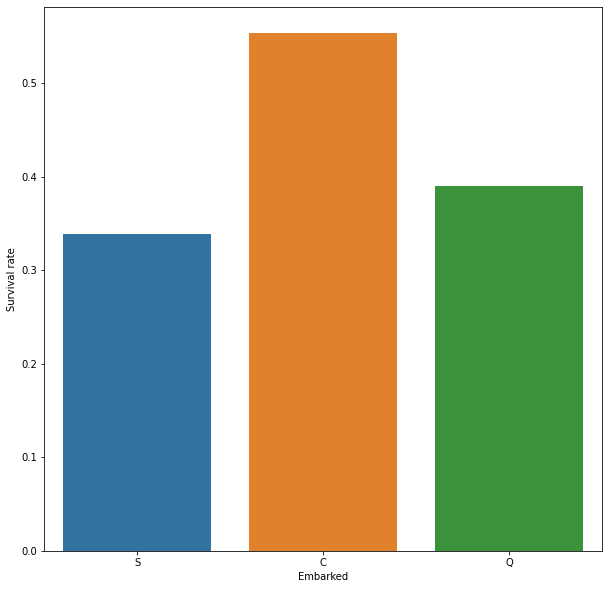

In [33]:
bar_chart_compare(train,'Embarked')

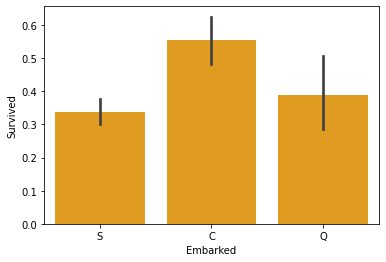

In [36]:
sns.barplot('Embarked','Survived',data=train,color='orange')
plt.show()

Passengers who boarded Cherbourg appear to have the highest chance of survival, with Southampton having the least chance of survival. When we observe the size of the whiskers between the Southampton and Queensworth, since the upper and lower whisker of Queensworth plot inludes the average of Sothampton ,it could be possible that that those who boarded Queensworth were equally or more likely to succumb from the disaster than those who embarked from Southampton.

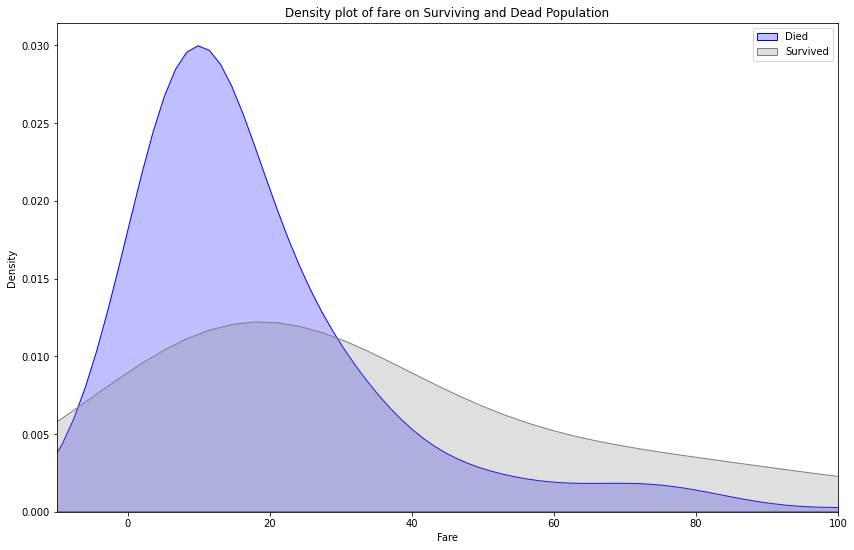

In [37]:
#Exploration of Fare

plt.figure(figsize=(14,9))
hx= sns.kdeplot(train['Fare'][train.Survived == 0],color='blue',shade=True)
sns.kdeplot(train['Fare'][train.Survived == 1],color='grey',shade=True)
plt.legend(['Died','Survived'])
plt.title('Density plot of fare on Surviving and Dead Population')
hx.set(xlabel='Fare')
plt.xlim(-10,100)
plt.show()

# 5.) Data Wrangling

In the data wrangling aside from sorting out missing values,processes such as merging the train and test datasets into a single dataset and mapping data from one form to another for easier analytics by machine learning algorithms.

In [38]:
train=train.drop(['Ticket'],axis=1)


In [39]:
test=test.drop(['Ticket','Cabin'],axis=1)

In [40]:
#combining the two datasets
combine=[train,test]

#extracting title from the dataset
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\. ',expand=False)
    
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [41]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Master','Major','Rev','Sir'], 'Other')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].replace(['Ms','Mlle'],'Miss')
    
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Miss,0.702703
1,Mr,0.156673
2,Mrs,0.793651
3,Other,0.492063


In [42]:
#Mapping by coverting the 'Title' categorical variables to ordinal
title_mapping={'Miss':1,'Mr':2, 'Mrs':3, 'Other':4}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


In [43]:
train=train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)


In [44]:
gender_mapping ={"male":0 ,"female":1}
train['Sex'] =train['Sex'].map(gender_mapping)
test['Sex'] = test['Sex'].map(gender_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,2
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,1
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,2


In [45]:
combine=[train,test]

In [46]:
guess_age =np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [47]:
train['AgeGroup']=pd.cut(train['Age'],5)
train[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False).mean().sort_values(by='AgeGroup',ascending=True)

,AgeGroup,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [48]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16.336,'Age']=0
    dataset.loc[(dataset['Age']>16.336) & (dataset['Age']<=32.252),'Age']=1
    dataset.loc[(dataset['Age']>32.252) & (dataset['Age']<=48.168),'Age']=2
    dataset.loc[(dataset['Age']>48.168) & (dataset['Age']<=64.084),'Age']=3 
    dataset.loc[dataset['Age']>64.084,'Age']=4
    dataset.loc[dataset['Age']>64.084,'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1.0,1,0,7.2500,S,2,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,1,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,2,"(32.252, 48.168]"


In [49]:
train=train.drop(['AgeGroup'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,2
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,1
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,2


In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,2
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,1
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,2


In [51]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,2
1,1,1,1,2.0,1,0,71.2833,1,3
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,2.0,1,0,53.1000,0,3
4,0,3,0,2.0,0,0,8.0500,0,2


In [52]:
train['FareGroup']=pd.qcut(train['Fare'], 4)
train[['FareGroup','Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup',ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [53]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0),'Fare']=2
    dataset.loc[dataset['Fare']>31.0,'Fare']=3
    dataset.loc[dataset['Fare']>31.0,'Fare'].astype(int)  
    
train=train.drop(['FareGroup'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,2
1,1,1,1,2.0,1,0,3.0,1,3
2,1,3,1,1.0,0,0,1.0,0,1
3,1,1,1,2.0,1,0,3.0,0,3
4,0,3,0,2.0,0,0,1.0,0,2


In [54]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,2
1,1,1,1,2.0,1,0,3.0,1,3
2,1,3,1,1.0,0,0,1.0,0,1
3,1,1,1,2.0,1,0,3.0,0,3
4,0,3,0,2.0,0,0,1.0,0,2
5,0,3,0,1.0,0,0,1.0,2,2
6,0,1,0,3.0,0,0,3.0,0,2
7,0,3,0,0.0,3,1,2.0,0,4
8,1,3,1,1.0,0,2,1.0,0,3
9,1,2,1,0.0,1,0,2.0,1,3


In [55]:
test['Age'].fillna(test['Age'].median(skipna=True),inplace=True)

In [56]:
test['Fare'].fillna(test['Fare'].median(skipna=True),inplace=True)

In [57]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

# 6.) Choosing the best model
1.Splitting the training data

In [58]:
from sklearn.model_selection import  train_test_split
x_train=train.drop('Survived',axis=1)
y_train=train['Survived']
x_test=test.drop('PassengerId',axis=1).copy()

**Testing diffent machine learning models**

I will be testing the following models from the training dataset as well as check for accuracy
* Random Forest
* Logistic Regression
* Linear SVC
* K-Nearest Neighbors
* Gaussian Naive Bayes
* Stocahstic Gradient Descent
* Perceptron
* Decision Tree

In [59]:
#Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)
pc_random_forest=round(random_forest.score(x_train,y_train)*100,2)
pc_random_forest

89.23

In [60]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
pc_logreg=round(logreg.score(x_train,y_train)*100,2)
pc_logreg

80.58

In [61]:
#Linear SVC
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
pc_linear_svc=round(linear_svc.score(x_train,y_train)*100,2)
pc_linear_svc

80.47

In [62]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
pc_knn=round(knn.score(x_train,y_train)*100,2)
pc_knn

85.52

In [63]:
#Gaussian Naive Bayes
gaussian_nb=GaussianNB()
gaussian_nb.fit(x_train,y_train)
y_pred=gaussian_nb.predict(x_test)
pc_gaussian_nb=round(gaussian_nb.score(x_train,y_train)*100,2)
pc_gaussian_nb

78.23

In [64]:
#Support Vector Machines
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
pc_svc=round(svc.score(x_train,y_train)*100,2)
pc_svc

83.5

In [65]:
#Stochastic Gradient Descent
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
pc_sgd=round(sgd.score(x_train,y_train)*100,2)
pc_sgd

79.12

In [66]:
#Perceptron
perceptron=Perceptron()
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
pc_perceptron=round(perceptron.score(x_train,y_train)*100,2)
pc_perceptron

61.84

In [67]:
#Decision Tree 
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
pc_decision_tree=round(decision_tree.score(x_train,y_train)*100,2)
pc_decision_tree

89.23

And now to compare the accuracies of each model.

In [68]:
models=pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression','Linear SVC','KNN','Naive Bayes',
             'Support Vector Machines','Stochastic Gradient Descent','Perceptron','Decision Tree'],
    'Percent Score':[pc_random_forest,pc_logreg,pc_linear_svc,pc_knn,pc_gaussian_nb,pc_svc,pc_sgd,pc_perceptron,pc_decision_tree]})
models.sort_values(by="Percent Score",ascending=False)

,Model,Percent Score
0,Random Forest,89.23
8,Decision Tree,89.23
3,KNN,85.52
5,Support Vector Machines,83.50
1,Logistic Regression,80.58
2,Linear SVC,80.47
6,Stochastic Gradient Descent,79.12
4,Naive Bayes,78.23
7,Perceptron,61.84


In [70]:
import mglearn

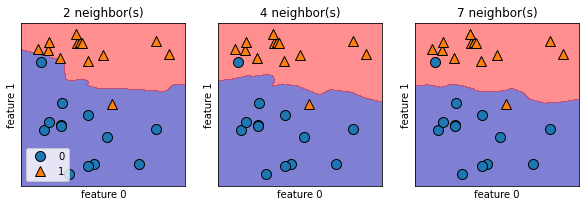

In [71]:
fig, axes=plt.subplots(1,3, figsize=(10,3))
x,y =mglearn.datasets.make_forge()
for n_neighbors, ax in zip([2,4,7],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,alpha=0.5)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

We are trying to find out the effect of the boundaries between different values of K. As the value of k increases, the boundary separating the two classes becomes smoother. If we were to further increase the value of k to possibly infinity, it would finally either be all red or blue depending on the majority .

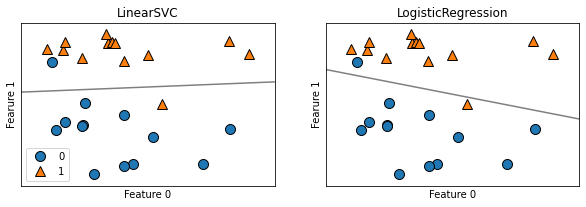

In [72]:
x,y = mglearn.datasets.make_forge()
fig, axes =plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=False,eps=0.5,ax=ax,alpha=0.5)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Fearure 1')
axes[0].legend()

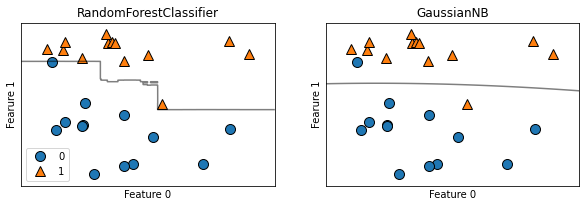

In [73]:
x,y = mglearn.datasets.make_forge()
fig, axes =plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([RandomForestClassifier(),GaussianNB()],axes):
    clf=model.fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=False,eps=0.5,ax=ax,alpha=0.5)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Fearure 1')
axes[0].legend()

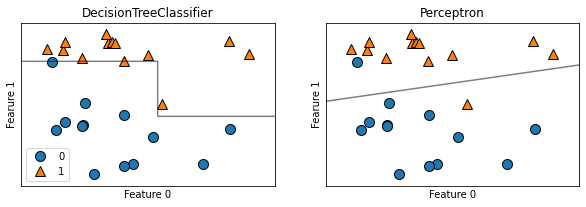

In [74]:
x,y = mglearn.datasets.make_forge()
fig, axes =plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([DecisionTreeClassifier(),Perceptron()],axes):
    clf=model.fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=False,eps=0.5,ax=ax,alpha=0.5)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Fearure 1')
axes[0].legend()